In [ ]:
pip install -U fortran-magic

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 31 µs, sys: 4 µs, total: 35 µs
Wall time: 41 µs


[[17, 14, 17, 17], [24, 21, 26, 27], [45, 42, 53, 57]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.150
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out



**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time

matmul(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmuls(A, B):
    """Multiply matrix A by matrix B."""
    # Si la matriz es compatible realiza la multiplicacion
    if len(A[0]) == len(B):

      rows_out = len(A)
      cols_out = len(B[0])
      out = [[0 for col in range(cols_out)] for row in range(rows_out)]

      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
      return out
    # En caso de no ser compatible, retorna un error
    else:
      raise ArithmeticError('Dimensiones no compatibles')

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

ArithmeticError: Dimensiones no compatibles

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [4, 2, 2, 1]]


**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
%%time

matmul(a, b)

CPU times: user 34 µs, sys: 4 µs, total: 38 µs
Wall time: 42.9 µs


[[17, 14, 17, 17], [24, 21, 26, 27], [45, 42, 53, 57]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

1.3288961552636003

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.02904332770090734, 0.17301233175517272, 0.7272926495151959],
 [0.25900482697885296, 0.12532044234478545, 0.5754903324502271]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
%%time

randm = random_matrix(600, 100)
randn = random_matrix(100, 600)
x = matmul(randm, randn)


CPU times: user 9.83 s, sys: 23.4 ms, total: 9.86 s
Wall time: 10.6 s


| Ejecucion   | Tiempo |
|-------------|--------|
| 1    | 9.49 s   |
| 2    | 9.01 s   |
| 3    | 8.66 s   |
| 4    | 8.72 s   |
| 5    | 9.8 s    |*texto en cursiva*
| 6    | 9.34 s   |
| 7    | 9.19 s   |
| 8    | 9.78 s   |
| 9    | 9.8 s    |
| 10   | 9.92 s   |

Ahora el promedio de estos tiempo es = 9.371 s

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
pip install pandas

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguage': ['Python'],
    'Tiempo promedio seg': [ 9.371]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1
# Mostrar tabla
df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)


,Lenguage,Tiempo promedio seg
1,Python,9.371000


My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays adding NumPy's average execution time

In [ ]:
import numpy as np

In [ ]:
%%time
randa = np.random.rand(100,600)
randb = np.random.rand(600,100)

x = np.matmul(randa, randb)

CPU times: user 3.76 ms, sys: 732 µs, total: 4.49 ms
Wall time: 2.96 ms



| Índice | Tiempo (ms) |
|--------|-------------|
| 1      | 4.25        |
| 2      | 5.07        |
| 3      | 3.43        |
| 4      | 3.84        |
| 5      | 4.86        |
| 6      | 5.52        |
| 7      | 4.93        |
| 8      | 4.06        |
| 9      | 7.99        |
| 10     | 5.05        |


Ahora el promedio de estos tiempo es = 4.9 ms

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguage': ['Python','Numpy'],
    'Tiempo promedio seg': [ 9.371, 0.0049]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1
# Mostrar tabla
df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)

,Lenguage,Tiempo promedio seg
1,Python,9.371000
2,Numpy,0.004900


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 9.8 s, sys: 23.1 ms, total: 9.83 s
Wall time: 9.9 s


In [ ]:

# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

Traceback (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/__main__.py", line 5, in <module>
    main()
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/f2py2e.py", line 766, in main
    run_compile()
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/f2py2e.py", line 594, in run_compile
    build_backend = f2py_build_generator(backend_key)
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/_backends/__init__.py", line 6, in f2py_build_generator
    from ._distutils import DistutilsBackend
  File "/usr/local/lib/python3.10/dist-packages/numpy/f2py/_backends/_distutils.py", line 3, in <module>
    from numpy.distutils.core import setup, Extension
  File "/usr/local/lib/python3.10/dist-packages/numpy/distutils/core.py", lin

RuntimeError: f2py failed, see output

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

NameError: name 'python_dot_product' is not defined

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

NameError: name 'fortran_dot_product' is not defined

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:

A = [[1, 2],
     [2, 3]]

B = [[1, 2],
     [2, 1]]

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpf.f90
program matriz_multiplicacion
    implicit none
    integer, parameter :: m = 100, n = 600, p = 100
    real :: A(m, n), B(n, p), C(m, p)
    integer :: i, j, k

    ! Inicializar la semilla para la generación de números aleatorios
    call random_seed()

    ! Crear matriz A (100x600) con valores aleatorios
    do i = 1, m
        do j = 1, n
            call random_number(A(i, j))
        end do
    end do

    ! Crear matriz B (600x100) con valores aleatorios
    do i = 1, n
        do j = 1, p
            call random_number(B(i, j))
        end do
    end do

    ! Inicializar matriz C (100x100) a cero
    C = 0.0

    ! Multiplicación de matrices: C = A * B
    do i = 1, m
        do j = 1, p
            do k = 1, n
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do


end program matriz_multiplicacion


Writing tmpf.f90


In [ ]:
!gfortran tmpf.f90 -o tmpf

| Índice | Tiempo (ms) |
|--------|-------------|
| 1      | 104         |
| 2      | 104         |
| 3      | 104         |
| 4      | 103         |
| 5      | 103         |
| 6      | 104         |
| 7      | 105         |
| 8      | 104         |
| 9      | 105         |
| 10     | 105         |

El promedio es: 104.1 ms


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!./tmpf

CPU times: user 4.8 ms, sys: 1.03 ms, total: 5.83 ms
Wall time: 105 ms


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguage': ['Python','Numpy','Fortran'],
    'Tiempo promedio seg': [ 9.371, 0.0049,0.1041]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1
# Mostrar tabla
df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)

,Lenguage,Tiempo promedio seg
1,Python,9.371000
2,Numpy,0.004900
3,Fortran,0.104100


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpc.c
#include <stdlib.h>
#include <time.h>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

// Function to perform matrix multiplication
void matrix_multiply(double A[ROWS_A][COLS_A], double B[ROWS_B][COLS_B], double C[ROWS_A][COLS_B]) {
    for (int i = 0; i < ROWS_A; i++) {
        for (int j = 0; j < COLS_B; j++) {
            C[i][j] = 0;
            for (int k = 0; k < COLS_A; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    double A[ROWS_A][COLS_A], B[ROWS_B][COLS_B], C[ROWS_A][COLS_B];

    // Initialize matrices A and B with random values between 0 and 10
    srand(time(NULL));  // Seed the random number generator
    for (int i = 0; i < ROWS_A; i++) {
        for (int j = 0; j < COLS_A; j++) {
            A[i][j] = (double)rand() / RAND_MAX * 10;  // Scale to 0-10
        }
    }

    for (int i = 0; i < ROWS_B; i++) {
        for (int j = 0; j < COLS_B; j++) {
            B[i][j] = (double)rand() / RAND_MAX * 10;  // Scale to 0-10
        }
    }

    matrix_multiply(A, B, C);

    return 0;
}


Overwriting tmpc.c


In [ ]:
!gcc tmpc.c -o tmpc

**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!./tmpc

CPU times: user 6.46 ms, sys: 1.06 ms, total: 7.52 ms
Wall time: 204 ms


| Índice | Tiempo (ms) |
|--------|-------------|
| 1      | 204         |
| 2      | 205         |
| 3      | 204         |
| 4      | 203         |
| 5      | 204         |
| 6      | 204         |
| 7      | 204         |
| 8      | 205         |
| 9      | 205         |
| 10     | 204         |

Promedio de tiempo: 204.2 ms

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguage': ['Python','Numpy','Fortran','C'],
    'Tiempo promedio seg': [ 9.371, 0.0049, 0.1041, 0.2042]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1
# Mostrar tabla
df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)

,Lenguage,Tiempo promedio seg
1,Python,9.371000
2,Numpy,0.004900
3,Fortran,0.104100
4,C,0.204200


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmpc++.cpp
#include <iostream>
#include <cstdlib> // Para std::rand y std::srand
#include <ctime>   // Para std::time

const int ROWS_A = 100;  // Filas de la primera matriz
const int COLS_A = 600;  // Columnas de la primera matriz
const int ROWS_B = 600;  // Filas de la segunda matriz
const int COLS_B = 100;  // Columnas de la segunda matriz


// Función para multiplicar dos matrices
void multiplyMatrices(int A[][COLS_A], int B[][COLS_B], int C[][COLS_B]) {
    for (int i = 0; i < ROWS_A; i++) {
        for (int j = 0; j < COLS_B; j++) {
            C[i][j] = 0; // Inicializar el elemento C[i][j]
            for (int k = 0; k < COLS_A; k++) {
                C[i][j] += A[i][k] * B[k][j]; // Sumar producto
            }
        }
    }
}

int main() {
    // Inicializar la semilla para generar números aleatorios
    std::srand(static_cast<unsigned int>(std::time(0)));

    // Declarar y llenar la primera matriz (100 x 600)
    int A[ROWS_A][COLS_A];
    for (int i = 0; i < ROWS_A; i++) {
        for (int j = 0; j < COLS_A; j++) {
            A[i][j] = std::rand() % 10; // Números aleatorios entre 0 y 9
        }
    }

    // Declarar y llenar la segunda matriz (600 x 100)
    int B[ROWS_B][COLS_B];
    for (int i = 0; i < ROWS_B; i++) {
        for (int j = 0; j < COLS_B; j++) {
            B[i][j] = std::rand() % 10; // Números aleatorios entre 0 y 9
        }
    }

    // Declarar la matriz resultante (100 x 100)
    int C[ROWS_A][COLS_B];

    // Multiplicar las matrices
    multiplyMatrices(A, B, C);

    return 0;
}


Writing tmpc++.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ tmpc++.cpp -o tmpc++

In [ ]:
%%time
!./tmpc++

CPU times: user 5.36 ms, sys: 1.07 ms, total: 6.43 ms
Wall time: 103 ms


| Índice | Tiempo (ms) |
|--------|-------------|
| 1      | 103         |
| 2      | 105         |
| 3      | 105         |
| 4      | 104         |
| 5      | 104         |
| 6      | 107         |
| 7      | 103         |
| 8      | 103         |
| 9      | 106         |
| 10     | 103         |

Promedio de tiempo: 104.3 ms


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguage': ['Python','Numpy','Fortran','C','C++'],
    'Tiempo promedio seg': [ 9.371, 0.0049, 0.1041, 0.2042, 0.1043]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1
# Mostrar tabla
df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)

,Lenguage,Tiempo promedio seg
1,Python,9.371000
2,Numpy,0.004900
3,Fortran,0.104100
4,C,0.204200
5,C++,0.104300


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile Main.java
import java.util.Random;

public class Main {
    public static void main(String[] args) {
        int rowsA = 100;
        int colsA = 600;
        int rowsB = 600;
        int colsB = 100;

        // Crear las matrices
        int[][] matrixA = generateRandomMatrix(rowsA, colsA);
        int[][] matrixB = generateRandomMatrix(rowsB, colsB);

        // Multiplicar las matrices
        int[][] resultMatrix = multiplyMatrices(matrixA, matrixB);

    }

    // Método para generar una matriz aleatoria
    private static int[][] generateRandomMatrix(int rows, int cols) {
        int[][] matrix = new int[rows][cols];
        Random random = new Random();
        for (int i = 0; i < rows; i++) {
            for (int j = 0; j < cols; j++) {
                matrix[i][j] = random.nextInt(10); // números aleatorios del 0 al 9
            }
        }
        return matrix;
    }

    // Método para multiplicar dos matrices
    private static int[][] multiplyMatrices(int[][] A, int[][] B) {
        int rowsA = A.length;
        int colsA = A[0].length;
        int rowsB = B.length;
        int colsB = B[0].length;

        if (colsA != rowsB) {
            throw new IllegalArgumentException("El número de columnas de A debe ser igual al número de filas de B.");
        }

        int[][] result = new int[rowsA][colsB];
        for (int i = 0; i < rowsA; i++) {
            for (int j = 0; j < colsB; j++) {
                result[i][j] = 0;
                for (int k = 0; k < colsA; k++) {
                    result[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        return result;
    }
}


Writing Main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac Main.java

In [ ]:
%%time
!java Main

CPU times: user 6.15 ms, sys: 0 ns, total: 6.15 ms
Wall time: 205 ms


| Índice | Tiempo (ms) |
|--------|-------------|
| 1      | 205         |
| 2      | 205         |
| 3      | 209         |
| 4      | 204         |
| 5      | 204         |
| 6      | 206         |
| 7      | 207         |
| 8      | 205         |
| 9      | 205         |
| 10     | 205         |

Promedio de tiempo: 205.5 ms


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguage': ['Python','Numpy','Fortran','C','C++','Java'],
    'Tiempo promedio seg': [ 9.371, 0.0049, 0.1041, 0.2042, 0.1043, 0.2055]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1
# Mostrar tabla
df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)

,Lenguage,Tiempo promedio seg
1,Python,9.371000
2,Numpy,0.004900
3,Fortran,0.104100
4,C,0.204200
5,C++,0.104300
6,Java,0.205500


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile tmp.js

// Función para generar una matriz aleatoria de dimensiones dadas
function generarMatriz(filas, columnas) {
    const matriz = [];
    for (let i = 0; i < filas; i++) {
        const fila = [];
        for (let j = 0; j < columnas; j++) {
            fila.push(Math.floor(Math.random() * 10)); // Números aleatorios del 0 al 9
        }
        matriz.push(fila);
    }
    return matriz;
}

// Función para multiplicar dos matrices
function multiplicarMatrices(matrizA, matrizB) {
    const filasA = matrizA.length;
    const columnasA = matrizA[0].length;
    const filasB = matrizB.length;
    const columnasB = matrizB[0].length;

    // Verificar que las matrices se pueden multiplicar
    if (columnasA !== filasB) {
        throw new Error("Las matrices no se pueden multiplicar.");
    }

    // Crear la matriz resultado
    const matrizResultado = Array.from({ length: filasA }, () => Array(columnasB).fill(0));

    // Realizar la multiplicación
    for (let i = 0; i < filasA; i++) {
        for (let j = 0; j < columnasB; j++) {
            for (let k = 0; k < columnasA; k++) {
                matrizResultado[i][j] += matrizA[i][k] * matrizB[k][j];
            }
        }
    }

    return matrizResultado;
}

// Generar las matrices
const matrizA = generarMatriz(100, 600);
const matrizB = generarMatriz(600, 100);

// Multiplicar las matrices
const matrizResultado = multiplicarMatrices(matrizA, matrizB);



Writing tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
!node tmp.js

CPU times: user 3.91 ms, sys: 3.02 ms, total: 6.92 ms
Wall time: 204 ms


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


| Índice | Tiempo (ms) |
|--------|-------------|
| 1      | 204         |
| 2      | 204         |
| 3      | 204         |
| 4      | 204         |
| 5      | 206         |
| 6      | 206         |
| 7      | 205         |
| 8      | 203         |
| 9      | 204         |
| 10     | 204         |

Promedio de tiempo: 204.4 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguage': ['Python','Numpy','Fortran','C','C++','Java','JavaScript'],
    'Tiempo promedio seg': [ 9.371, 0.0049, 0.1041, 0.2042, 0.1043, 0.2055, 0.2044]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1
# Mostrar tabla
df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)

,Lenguage,Tiempo promedio seg
1,Python,9.371000
2,Numpy,0.004900
3,Fortran,0.104100
4,C,0.204200
5,C++,0.104300
6,Java,0.205500
7,JavaScript,0.204400


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguage': ['Python','Numpy','Fortran','C','C++','Java','JavaScript'],
    'Tiempo promedio seg': [9.371, 0.0049, 0.1041, 0.2042, 0.1043, 0.2055, 0.2044]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1

# Encontrar el valor mínimo y el lenguaje correspondiente
min_time = df['Tiempo promedio seg'].min()
min_language = df.loc[df['Tiempo promedio seg'] == min_time, 'Lenguage'].values[0]

# Imprimiendo el lenguaje con el tiempo promedio mínimo
print(f"El lenguaje con el tiempo promedio mínimo es: {min_language} con un tiempo de {min_time} segundos")


El lenguaje con el tiempo promedio mínimo es: Numpy con un tiempo de 0.0049 segundos


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguaje': ['Python', 'Numpy', 'Fortran', 'C', 'C++', 'Java', 'JavaScript'],
    'Tiempo promedio seg': [9.371, 0.0049, 0.1041, 0.2042, 0.1043, 0.2055, 0.2044]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1

# Calcular el tiempo mínimo (de NumPy)
min_time = df['Tiempo promedio seg'].min()

# Calcular el factor de velocidad
df['Factor de velocidad'] = df['Tiempo promedio seg'] / min_time



# Mostrar tabla
df.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)


,Lenguaje,Tiempo promedio seg,Factor de velocidad
1,Python,9.371000,1912.448980
2,Numpy,0.004900,1.000000
3,Fortran,0.104100,21.244898
4,C,0.204200,41.673469
5,C++,0.104300,21.285714
6,Java,0.205500,41.938776
7,JavaScript,0.204400,41.714286


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
import pandas as pd

# Crear datos
data = {
    'Lenguaje': ['Python', 'NumPy', 'Fortran', 'C', 'C++', 'Java', 'JavaScript'],
    'Tiempo promedio seg': [9.371, 0.0049, 0.1041, 0.2042, 0.1043, 0.2055, 0.2044]
}

# Crear DataFrame
df = pd.DataFrame(data)
df.index += 1

# Calcular el tiempo mínimo (de NumPy)
min_time = df['Tiempo promedio seg'].min()

# Calcular el factor de velocidad
df['Factor de velocidad'] = df['Tiempo promedio seg'] / min_time

# Ordenar el DataFrame por el tiempo promedio en orden ascendente
df_sorted = df.sort_values(by='Tiempo promedio seg')

# Mostrar tabla
df_sorted.style.set_table_styles(
    [{'selector': 'th', 'props': [('font-weight', 'bold')]}]
)


,Lenguaje,Tiempo promedio seg,Factor de velocidad
2,NumPy,0.004900,1.000000
3,Fortran,0.104100,21.244898
5,C++,0.104300,21.285714
4,C,0.204200,41.673469
7,JavaScript,0.204400,41.714286
6,Java,0.205500,41.938776
1,Python,9.371000,1912.448980


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

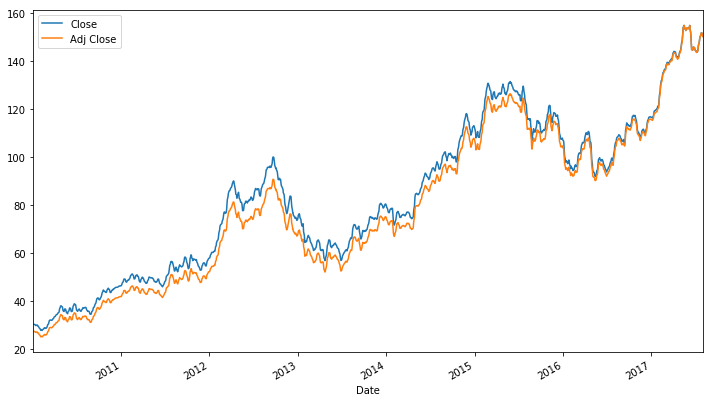

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

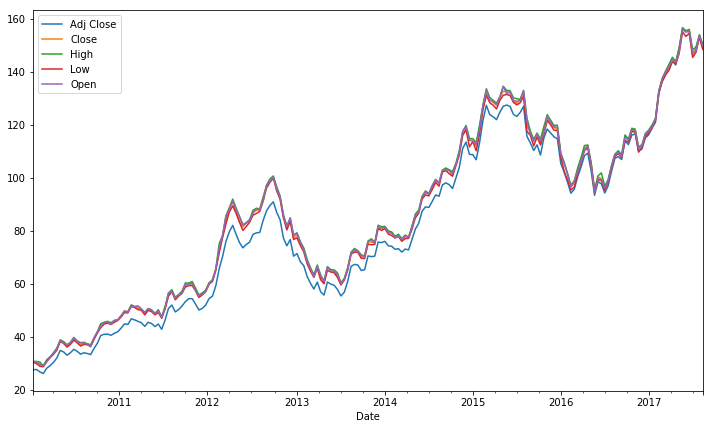

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

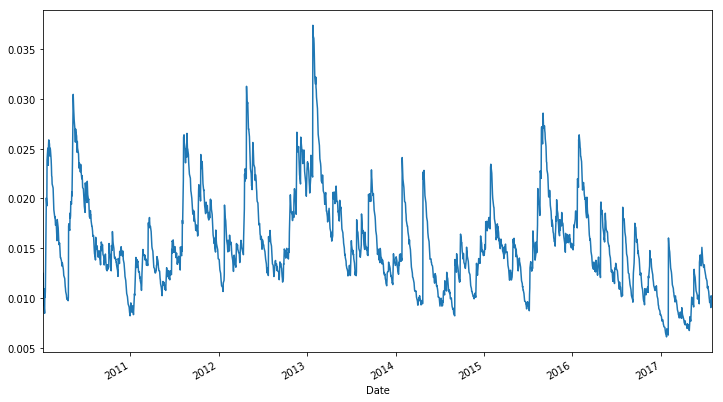

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
#from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-182-74fdf899ad9d>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Variety'].replace(


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

,0
Date,"datetime64[ns, UTC]"
Region,object
Variety,object
Organic,bool
Number of Stores,int64
Weighted Avg Price,float64
Low Price,float64
High Price,float64


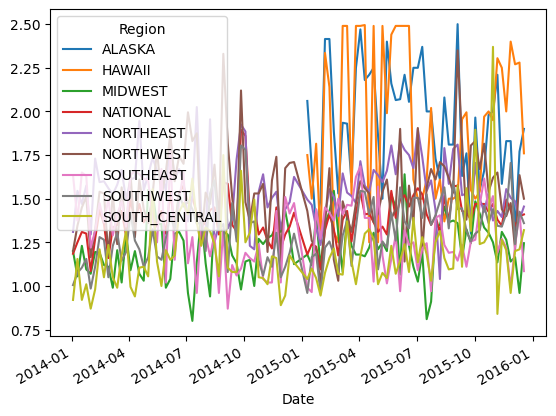

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

<ipython-input-186-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


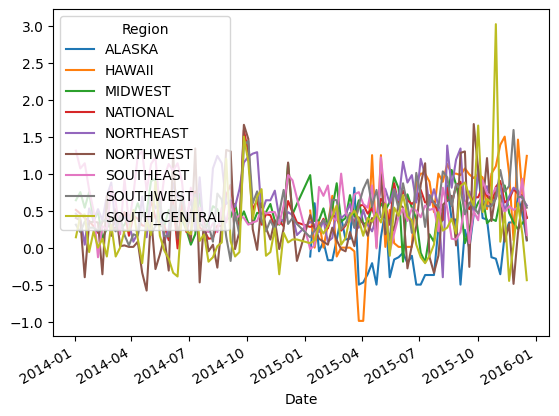

In [ ]:
organic_spread_by_region(hass).plot();
#plt.gca().set_title("Daily Regional Organic Spread");
#plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

<ipython-input-186-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


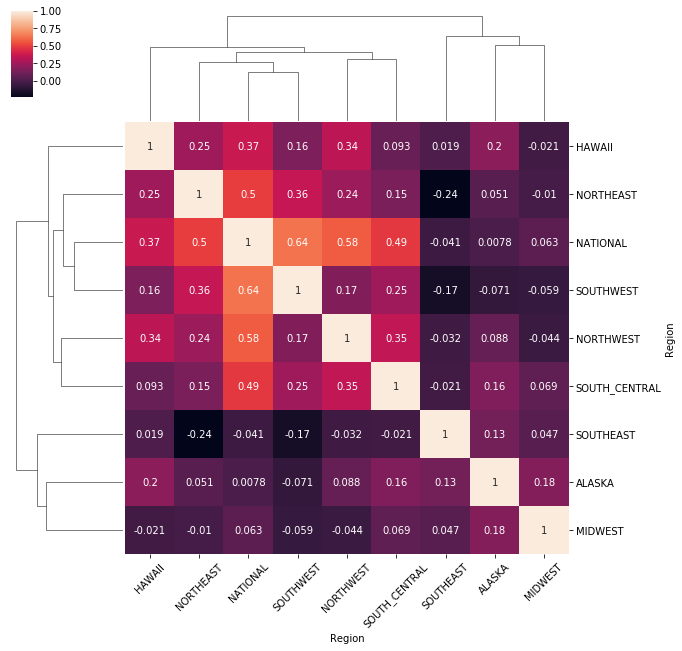

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

In [ ]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 88 (delta 22), reused 14 (delta 8), pack-reused 52 (from 1)
Receiving objects: 100% (88/88), 11.87 MiB | 34.73 MiB/s, done.
Resolving deltas: 100% (35/35), done.


Mi propio ejemplo con datos de colombia

Especificamente en este caso se estan utilizando los datos alojados en este link: https://www.datos.gov.co/Cultura/Programa-de-formaci-n-art-stica-casa-de-la-cultura/gftn-d5yr/about_data

Se descargan y se cargan en el directorio de colab con el nombre: Datos_col.csv

In [ ]:
pip install pandas

Ahora se cargan los datos y posteriormente se muestran

In [ ]:
import pandas as pd

tbl = pd.read_csv('Datos_col.csv')
tbl.head()

,AÑO,CURSO,MATERIA,GENERO,EDAD,GRUPO ETNICO,ZONA DE RESIDENCIA,TIPO DE DOCUMENTO,GRUPO POBLACIONAL
0,2024,ARTES PLASTICAS,CICLO DE FORMACION 3,MUJER,31,NINGUNO,RURAL,CEDULA DE CIUDADANA,NINGUNO
1,2024,ARTES PLASTICAS,CICLO DE FORMACION 1,MUJER,57,NINGUNO,URBANA,CEDULA DE CIUDADANA,NINGUNO
2,2024,ARTES PLASTICAS,CICLO DE FORMACION 1,MUJER,45,NINGUNO,URBANA,CEDULA DE CIUDADANA,NINGUNO
3,2024,ARTES PLASTICAS,CICLO DE FORMACION 1,MUJER,18,NO SABE NO RESPONDE,URBANA,CEDULA DE CIUDADANA,LGTBIQ+
4,2024,ARTES PLASTICAS,CICLO DE FORMACION 3,MUJER,21,NINGUNO,URBANA,CEDULA DE CIUDADANA,NINGUNO


Ahora mostramos los tipos de datos

In [ ]:
tbl.dtypes

,0
AÑO,int64
CURSO,object
MATERIA,object
GENERO,object
EDAD,int64
GRUPO ETNICO,object
ZONA DE RESIDENCIA,object
TIPO DE DOCUMENTO,object
GRUPO POBLACIONAL,object


Ahora lo que vamos a hacer es filtrar los datos, donde solo aparescan las personas mujer. Agrupandolos por el curso y la zona de residencia, para posteriormente graficar la edad en relacion con los cursos y la zona de residencia.

Tal como se muestra en el grafico

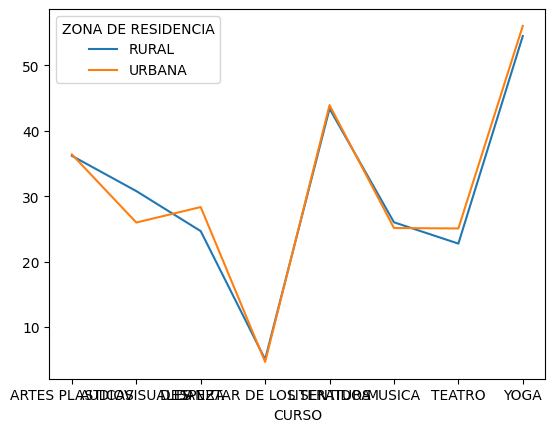

In [ ]:
result = tbl[tbl.GENERO == 'MUJER']
result.groupby(['CURSO','ZONA DE RESIDENCIA'])['EDAD'].mean().unstack().ffill().plot();